In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from sklearn.preprocessing import LabelEncoder , OrdinalEncoder

In [3]:
df = sns.load_dataset("titanic")

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [14]:
df[["embarked","class","sex"]].isna().sum()

embarked    0
class       0
sex         0
dtype: int64

In [12]:
df=df.dropna(subset=["embark_town"])
#df deki embark_town nan dropla yeni dfe at

In [13]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [16]:
df["sex"].value_counts()

sex
male      577
female    312
Name: count, dtype: int64

In [18]:
df["embark_town"].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [19]:
df["class"].value_counts()

class
Third     491
First     214
Second    184
Name: count, dtype: int64

In [24]:
#oneHot Encoding 
#get_dummies()=Convert categorical variable into dummy/indicator variables.
oneHot = pd.get_dummies(df,columns=["sex"])
oneHot
#eğer dropfirt tru yaparsan daha sade veri alırsın sex_male true ysa erkek falssa kadın gibi daha sade 
oneHotdropfirst = pd.get_dummies(df,columns=["sex"],drop_first=True)


In [51]:
oneHotdropfirst
#sadece sex male kaldı

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,22.0,1,0,7.2500,S,Third,man,True,NaN,no,False,True,False,True
1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,yes,False,False,False,False
2,1,3,26.0,0,0,7.9250,S,Third,woman,False,NaN,yes,True,False,False,True
3,1,1,35.0,1,0,53.1000,S,First,woman,False,C,yes,False,False,False,True
4,0,3,35.0,0,0,8.0500,S,Third,man,True,NaN,no,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,Second,man,True,NaN,no,True,True,False,True
887,1,1,19.0,0,0,30.0000,S,First,woman,False,B,yes,True,False,False,True
888,0,3,NaN,1,2,23.4500,S,Third,woman,False,NaN,no,False,False,False,True
889,1,1,26.0,0,0,30.0000,C,First,man,True,C,yes,True,True,False,False


In [27]:
oneHotdropfirst2 = pd.get_dummies(df,columns=["sex","embark_town"],drop_first=True)

In [29]:
oneHotdropfirst2.columns
#'embark_town_Queenstown', 'embark_town_Southampton' ikisi de false ise Cherbourg da binmiş gibi


Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'embarked',
       'class', 'who', 'adult_male', 'deck', 'alive', 'alone', 'sex_male',
       'embark_town_Queenstown', 'embark_town_Southampton'],
      dtype='object')

In [30]:
#yukardakiler pandas tan geldi bu sklearn
#label encoder
labelEncoder= LabelEncoder()

In [31]:
df_label =df.copy()

In [32]:
df_label["sex"]= labelEncoder.fit_transform(df_label["sex"])
#sex column transform with label encoder

In [33]:
df_label

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,0,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Ordinal Encoder

In [34]:
##df te class ordinale en uygun gibi 

In [45]:
from sklearn.preprocessing import OrdinalEncoder

# 1. Kategorileri "liste içinde liste" olarak tanımlıyoruz
# Sıralama Önemli: 0 -> third, 1 -> second, 2 -> first olacak
categories = [["Third", "Second", "First"]]

# 2. Encoder'ı oluşturuyoruz
ordinalEncoder = OrdinalEncoder(categories=categories)

# 3. Dönüştürme (Çift parantez kullanmaya dikkat!)
df_label["class_encoded"] = ordinalEncoder.fit_transform(df_label[["class"]])

# Sonucu görelim
print(df_label[["class", "class_encoded"]].head())
df_label

   class  class_encoded
0  Third            0.0
1  First            2.0
2  Third            0.0
3  First            2.0
4  Third            0.0


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,class_encoded
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0.0
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2.0
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0.0
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2.0
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,1.0
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,2.0
888,0,3,0,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,0.0
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,2.0


<Axes: title={'center': 'One-Hot Encoded'}>

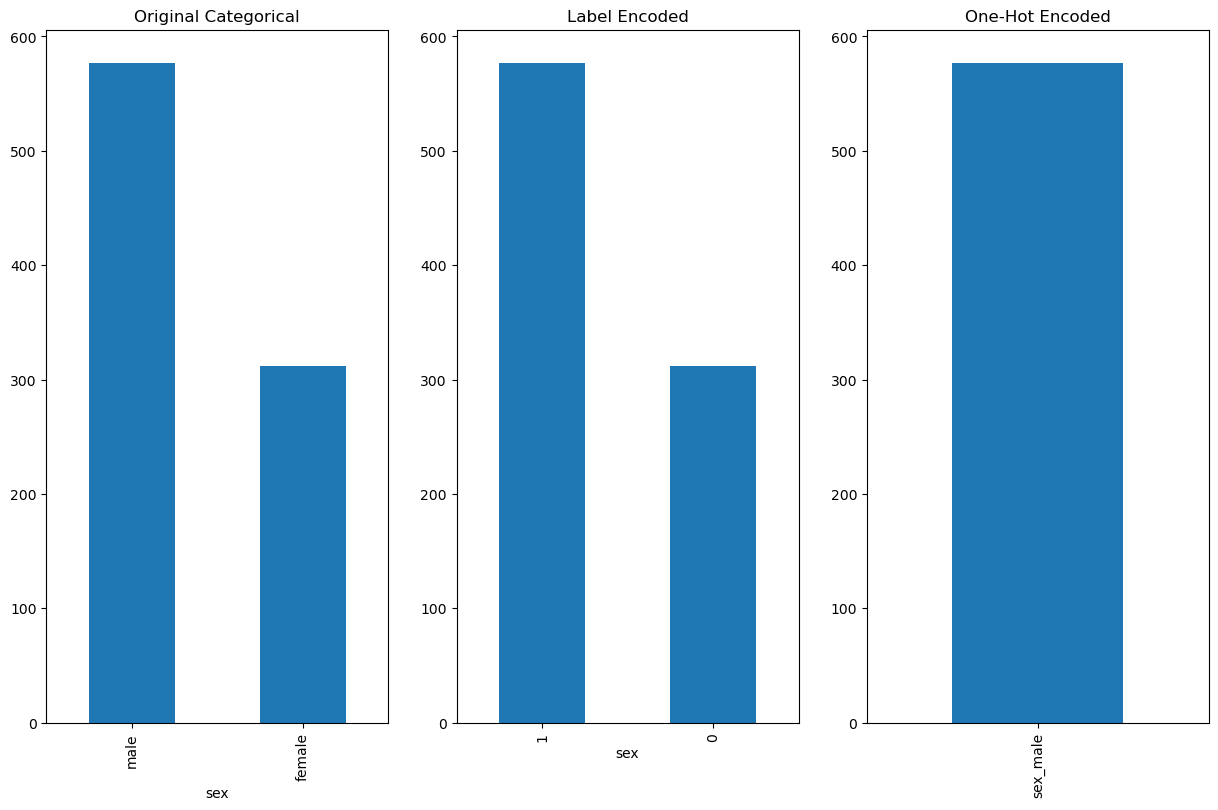

In [54]:
# Visualization to see the effect of encoding
fig, axes = plt.subplots(1, 3, figsize=(15, 9))
df["sex"].value_counts().plot(kind="bar", ax=axes[0], title="Original Categorical")
df_label["sex"].value_counts().plot(kind="bar", ax=axes[1], title="Label Encoded")
oneHotdropfirst[["sex_male"]].sum().plot(kind="bar", ax=axes[2], title="One-Hot Encoded")

## SUMMARY


Here is the summary of your course section with Python code.

1. Imbalanced Dataset (Dengesiz Veri Seti)

What is it? It happens when one category in your data is much larger than the other.

Daily Life Example: Imagine a Spotify playlist with 95 Pop songs and 5 Rock songs. If you put it on shuffle, you will almost never hear Rock. The playlist is "imbalanced."

Finance Example: Fraud Detection. In a bank, 99% of transactions are safe, and only 1% are fraud. The model will just guess "Safe" every time and be 99% correct, but it will miss the fraud.

In [2]:
import pandas as pd

# Creating a sample finance dataset
data = pd.DataFrame({
    'Transaction_Type': ['Safe'] * 95 + ['Fraud'] * 5
})

# Check the balance
print(data['Transaction_Type'].value_counts())
# Output:
# Safe     95
# Fraud     5

Transaction_Type
Safe     95
Fraud     5
Name: count, dtype: int64


2. Resampling & SMOTE

What is it? We need to fix the imbalance.

Undersampling: Delete some "Safe" data (bad idea, we lose info).

Oversampling: Copy the "Fraud" data (okay, but repetitive).

SMOTE (Synthetic Minority Oversampling Technique): Create new, artificial examples of fraud that look like the real ones.

Daily Life Example: Your Rock band needs a drummer. Instead of cloning your current drummer (Oversampling), you find a new person who plays exactly like your drummer (SMOTE).

Finance Example: We generate fake "Fraud" transactions mathematically to train the AI to recognize them better.

In [7]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

# Create imbalanced data (X = features, y = labels)
X, y = make_classification(n_samples=100, n_classes=2, weights=[0.95, 0.05])

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f"Original shape: {y.shape}")     # (100,)
print(f"New shape: {y_resampled.shape}") # Balanced!

Original shape: (100,)
New shape: (186,)


3. Encoding (Label/Ordinal & One-Hot)

Computers only understand numbers (0,1,100). They do not understand text like "Istanbul" or "High Risk." We must convert text to numbers.

A. Label & Ordinal Encoding

Use this when the data has a specific order or rank.

Daily Life Example: T-shirt sizes. S, M, L. Small is smaller than Medium.

S → 0

M → 1

L → 2

Finance Example: Credit Ratings. AAA, BB, C.

C → 0

BB → 1

AAA → 2

In [5]:
from sklearn.preprocessing import LabelEncoder

# Data with order
ratings = ['C', 'BB', 'AAA', 'C', 'AAA']

encoder = LabelEncoder()
encoded_ratings = encoder.fit_transform(ratings)

print(encoded_ratings)
# Output might be: [2, 1, 0, 2, 0] (Depends on alphabetical order or custom map)


[2 1 0 2 0]


B. One-Hot Encoding (Get Dummies)

Use this when there is NO order.

Daily Life Example: Colors. Red, Blue, Green. Red is not "greater" than Blue. If we say Red=1 and Blue=2, the computer thinks Blue is "double" Red. That is wrong.

Finance Example: Sectors. Tech, Health, Energy.

We create a separate column (switch) for each.

In [6]:
# Data without order
df = pd.DataFrame({'Sector': ['Tech', 'Health', 'Tech', 'Energy']})

# Convert to One-Hot
encoded_df = pd.get_dummies(df, columns=['Sector'])

print(encoded_df)
# Output:
#    Sector_Energy  Sector_Health  Sector_Tech
# 0              0              0            1
# 1              0              1            0
# 2              0              0            1
# 3              1              0            0

   Sector_Energy  Sector_Health  Sector_Tech
0          False          False         True
1          False           True        False
2          False          False         True
3           True          False        False
